<a href="https://colab.research.google.com/github/shivam887423/OIBSIP/blob/main/Task_2_Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                             **Author : SHIVAM PANDEY**

#**OASIS INFOBYTE**
#**DATA SCIENCE INTERN**
# **TASK 2 : Iris Flowers Classification ML Project**

#  This is perhaps the best-known example in the field of machine learning.The aim is to classify iris flowers among three species (Setosa, Versicolor, or Virginica) from sepals' and petals' length and width measurements.The iris data set contains fifty instances of each of the three species.

# ***Importing Python libraries***

In [ ]:
#***Importing Python libraries***
#import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# **Mounting The Drive**

In [ ]:
#***Lets Mount The Drive***
from google.colab  import drive
drive.mount('/content.drive')


Mounted at /content.drive


## **Path Location** & **Reading The CSV Files**

In [ ]:
#***Lets see the drive location and read it***
file_path='/content/iris.data'
data=pd.read_csv(file_path)

# **Data Exlploration**

In [ ]:
#Lets print the data frame!
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


# From Above Given Dataset We Can Clearily See that The Names Of The Columns Are not understandable.So lets rename Them to get Clear Idea of The DataSet. 

# **Renaming The Columns**

In [ ]:
data.rename(columns={"5.1":"Sepal_Length","3.5":"Sepal_Width", "1.4":"Petal_Length", "0.2":"Petal_Width", "Iris-setosa":"Species",},inplace=True)
data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#lets know the shape and understand that how many rows and columns are there.
print(f'There are {data.shape[0]} rows & {data.shape[1]} columns')

There are 149 rows & 5 columns


In [ ]:
#making the list of the columns and knowing their data type
data.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species          object
dtype: object

In [ ]:
#now lets see the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  149 non-null    float64
 1   Sepal_Width   149 non-null    float64
 2   Petal_Length  149 non-null    float64
 3   Petal_Width   149 non-null    float64
 4   Species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [ ]:
#Checking the first 10 rows of the data
data.head(10)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [ ]:
#Checking the last 10 rows of the data
data.tail(10)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
139,6.7,3.1,5.6,2.4,Iris-virginica
140,6.9,3.1,5.1,2.3,Iris-virginica
141,5.8,2.7,5.1,1.9,Iris-virginica
142,6.8,3.2,5.9,2.3,Iris-virginica
143,6.7,3.3,5.7,2.5,Iris-virginica
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
#lets make the list of the data fram
data_list=list(data)
print(data_list)

['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']


# **SUMMARY OF THE DATASET**

In [ ]:
#small summary of the dataset
data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#We can know the columns also
data.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width',
       'Species'],
      dtype='object')

In [ ]:
#printing column name in list
print(list(data))

['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']


# **DATA** **CLEANING**





In [ ]:
#lets indentify the duplicate values in each columns
duplicate_columns=data[data.duplicated()]
data.count()

Sepal_Length    149
Sepal_Width     149
Petal_Length    149
Petal_Width     149
Species         149
dtype: int64

In [ ]:
#lets see duplicate value in rows using Boolean Type
#true means duplicate rows and False means non duplicate rows
data.duplicated().value_counts()


False    146
True       3
dtype: int64

In [ ]:
#lets remove the duplicated value and see how much data is left 
data=data.drop_duplicates()
data.shape

(146, 5)

# **Checking Null Values**

In [ ]:
#There are lots of null values in data.Lets check them
data.isnull().sum().sort_values(ascending=False)

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

# There is NO Null Value in the DataSet which is Very  Good Enough

In [ ]:
#creating new column called month
data[' Date'] = pd.to_datetime(data[' Date'], dayfirst=True)
data['month_int'] =  data[' Date'].dt.month
data['month'] =  data['month_int'].apply(lambda x: calendar.month_abbr[x])


# DATA **VISUALIZATION**

# Types OF Species

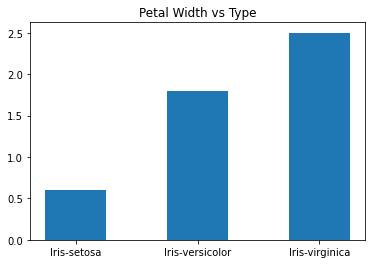

In [ ]:
# Petal Width vs Type
plt.bar(data['Species'],data['Petal_Width'], width = 0.5) 
plt.title("Petal Width vs Type")
plt.show()

# **SCATTERPLOT**

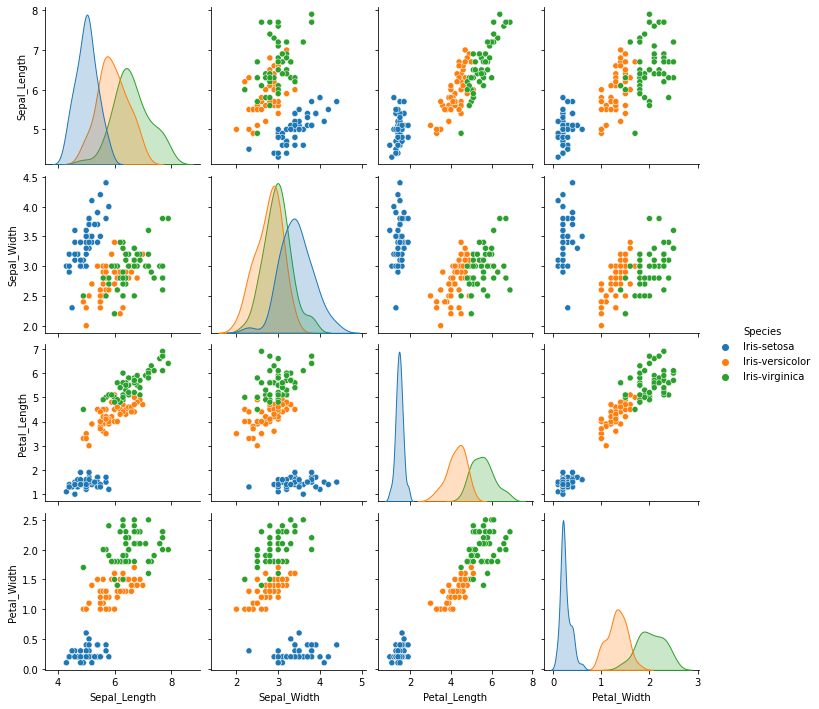

In [ ]:
#PAIRPLOT TO SEE VISUALIZE THE DATA
sns.pairplot(data,hue="Species")
plt.show()


# **2.HIST PLOT**

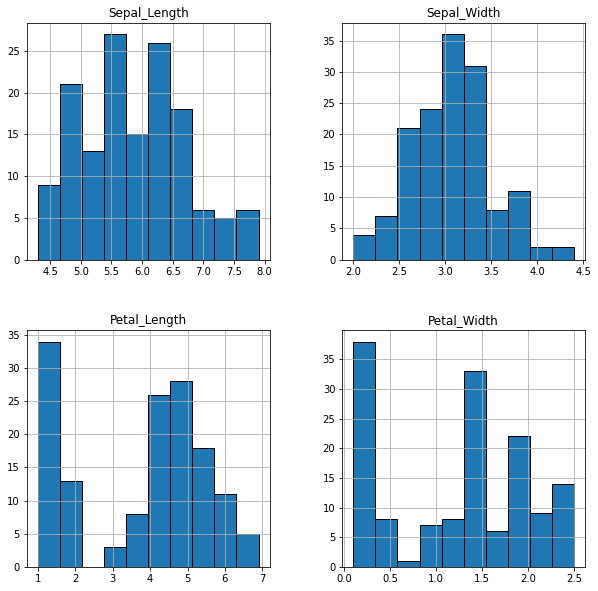

In [ ]:
data.hist(edgecolor='black',figsize=(10,10))
plt.show()

# 3.Sepal_Length Vs Petal_Length

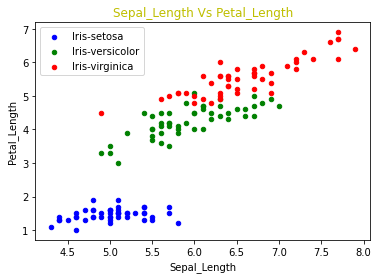

In [ ]:
#Scatter plot for sepal_length vs petal_length
plot=data[data.Species=="Iris-setosa"].plot.scatter(x="Sepal_Length",y="Petal_Length",color='b',label="Iris-setosa")
data[data.Species=="Iris-versicolor"].plot.scatter(x="Sepal_Length",y="Petal_Length",color='g',label="Iris-versicolor",ax=plot)
data[data.Species=="Iris-virginica"].plot.scatter(x="Sepal_Length",y="Petal_Length",color='r',label="Iris-virginica",ax=plot)

plt.title("Sepal_Length Vs Petal_Length",color='y')
plt.show()


# 4 Sepal_Width and Petal_Width


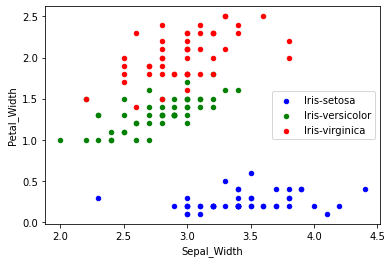

In [ ]:
#Scatter plot for sepal_length vs petal_length
plot=data[data.Species=="Iris-setosa"].plot.scatter(x="Sepal_Width",y="Petal_Width",color='b',label="Iris-setosa")
data[data.Species=="Iris-versicolor"].plot.scatter(x="Sepal_Width",y="Petal_Width",color='g',label="Iris-versicolor",ax=plot)
data[data.Species=="Iris-virginica"].plot.scatter(x="Sepal_Width",y="Petal_Width",color='r',label="Iris-virginica",ax=plot)

# **4.The Correlation between columns**

Text(0.5, 1.0, 'Correlation of the Columns')

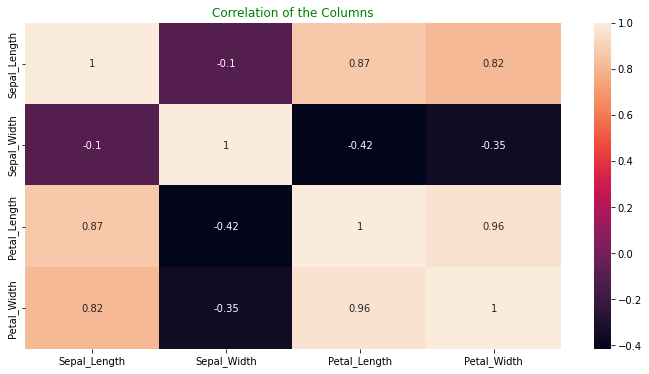

In [ ]:
## Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation of the Columns",color='green')

# **Fitting The Models**

In [ ]:
x = data.drop(columns="Species")
y = data["Species"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state =4)

In [ ]:
x_train.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
71,6.3,2.5,4.9,1.5
140,6.9,3.1,5.1,2.3
63,5.6,2.9,3.6,1.3
9,5.4,3.7,1.5,0.2
14,5.7,4.4,1.5,0.4


In [ ]:
x_test.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
147,6.2,3.4,5.4,2.3
5,4.6,3.4,1.4,0.3
65,5.6,3.0,4.5,1.5
29,4.8,3.1,1.6,0.2
37,4.4,3.0,1.3,0.2


In [ ]:
y_train.head()

12         Iris-setosa
2          Iris-setosa
97     Iris-versicolor
111     Iris-virginica
102     Iris-virginica
Name: Species, dtype: object

In [ ]:
y_test.head()

100     Iris-virginica
68     Iris-versicolor
55     Iris-versicolor
77     Iris-versicolor
123     Iris-virginica
Name: Species, dtype: object

In [ ]:
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)
print(x_test.shape)

(87, 4)
(59,)
(87,)
(59, 4)


# **Building Model using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
     

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

# Lets Print The Predicted Values

In [ ]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)   

# **ACCURACY**

In [ ]:
print("Training Accuracy : ", accuracy_score(y_train, y_train_pred))

Training Accuracy :  0.9885057471264368


# **Score of Test Data**

In [ ]:
print("Test Accuracy : ", accuracy_score(y_test, y_test_pred))


Test Accuracy :  0.9661016949152542


#**So here, we can see that the Accuracy rate of Training Data is  98% which is extremely perfect.**
# **The accuracy rate Test Data is apprx. 96% which is also perfect**